In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import DataLoader, Dataset
from torch.optim import SGD

In [2]:
X = pd.read_csv('LM_Data.csv', delimiter =',') #training data
y = pd.read_csv('selectivity_Data.csv',delimiter=',') #true output labels, original

In [3]:
X.head()

,Elevation <,Elevation =,Elevation >,Elevation values,Aspect <,Aspect =,Aspect >,Aspect values,Slope <,Slope =,...,Hillshade_Noon >,Hillshade_Noon values,Hillshade_3pm <,Hillshade_3pm =,Hillshade_3pm >,Hillshade_3pm values,Horizontal_Distance_To_Fire_Points <,Horizontal_Distance_To_Fire_Points =,Horizontal_Distance_To_Fire_Points >,Horizontal_Distance_To_Fire_Points values
0,0,0,1,2954,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,3031,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,3380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,2905,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,2919,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaler = MinMaxScaler()
cols = ['Elevation values','Aspect values', 'Slope values', 'Horizontal_Distance_To_Hydrology values','Vertical_Distance_To_Hydrology values', 'Horizontal_Distance_To_Roadways values', 'Hillshade_9am values','Hillshade_Noon values', 'Hillshade_3pm values', 'Horizontal_Distance_To_Fire_Points values']
X[cols] = scaler.fit_transform(X[cols])

In [5]:
#convert to numpy arrays
X = X.values
y = y.values #uaing this for model training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #testing 20%, trainig 80

In [7]:
#convert the X features to float tensors for pytorch.
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#converting selectivity, y labels to tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [8]:
y_train = y_train.float()
y_test = y_test.float()

In [9]:
#Neural Network Model, 2 hidden layers.
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__() # instantiate nn model
        self.fc1 = nn.Linear(40, 128)    #works better if we increase the number of nuerons in the hidden layers.
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)  # Output layer with single neuron

    def forward(self, x):
        print("Input shape:", x.shape)
        h1 = F.relu(self.fc1(x))
        print("Shape after fc1:", h1.shape)
        h2 = F.relu(self.fc2(h1))
        print("Shape after fc2:", h2.shape)
        output = self.out(h2)  # Linear activation for output layer
        print("Output shape:", output.shape)

        return output

In [10]:
epochs = 50
losses_128_64 = []
losses_64_32 = []
losses_32_16 = []
losses_64 = []

#optimizer- wasn't specifically mentioned, popular methods are SGD ADAM,
#learning rate wasn't specified, going to keep it as 0.01
model_128_64 = MyModel()
optimizer = torch.optim.Adam(model_128_64.parameters(), lr = 0.01)
criterion = nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_128_64(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Append the loss value to the list
    losses_128_64.append(loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch loss

with torch.no_grad():
    y_pred_test_128_64 = model_128_64.forward(X_test)

Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [1/50], Loss: 0.0071
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [2/50], Loss: 0.3832
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [3/50], Loss: 0.0198
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [4/50], Loss: 0.0042
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 128])
Shape after fc2: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [5/50], Loss: 0.0145
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 128])
S

In [11]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__() # instantiate nn model
        self.fc1 = nn.Linear(40, 64)    #works better if we increase the number of nuerons in the hidden layers.
        self.fc2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)  # Output layer with single neuron

    def forward(self, x):
        print("Input shape:", x.shape)
        h1 = F.relu(self.fc1(x))
        print("Shape after fc1:", h1.shape)
        h2 = F.relu(self.fc2(h1))
        print("Shape after fc2:", h2.shape)
        output = self.out(h2)  # Linear activation for output layer
        print("Output shape:", output.shape)

        return output

model_64_32 = MyModel()
optimizer = torch.optim.Adam(model_64_32.parameters(), lr = 0.01)
criterion = nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_64_32(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Append the loss value to the list
    losses_64_32.append(loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch loss

with torch.no_grad():
    y_pred_test_64_32 = model_64_32.forward(X_test)

Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Shape after fc2: torch.Size([16368, 32])
Output shape: torch.Size([16368, 1])
Epoch [1/50], Loss: 0.0030
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Shape after fc2: torch.Size([16368, 32])
Output shape: torch.Size([16368, 1])
Epoch [2/50], Loss: 0.0168
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Shape after fc2: torch.Size([16368, 32])
Output shape: torch.Size([16368, 1])
Epoch [3/50], Loss: 0.0014
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Shape after fc2: torch.Size([16368, 32])
Output shape: torch.Size([16368, 1])
Epoch [4/50], Loss: 0.0006
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Shape after fc2: torch.Size([16368, 32])
Output shape: torch.Size([16368, 1])
Epoch [5/50], Loss: 0.0017
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Shape a

In [12]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__() # instantiate nn model
        self.fc1 = nn.Linear(40, 32)    #works better if we increase the number of nuerons in the hidden layers.
        self.fc2 = nn.Linear(32, 16)
        self.out = nn.Linear(16, 1)  # Output layer with single neuron

    def forward(self, x):
        print("Input shape:", x.shape)
        h1 = F.relu(self.fc1(x))
        print("Shape after fc1:", h1.shape)
        h2 = F.relu(self.fc2(h1))
        print("Shape after fc2:", h2.shape)
        output = self.out(h2)  # Linear activation for output layer
        print("Output shape:", output.shape)

        return output

model_32_16 = MyModel()
optimizer = torch.optim.Adam(model_32_16.parameters(), lr = 0.01)
criterion = nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_32_16(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Append the loss value to the list
    losses_32_16.append(loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch loss

with torch.no_grad():
    y_pred_test_32_16 = model_32_16.forward(X_test)

Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 32])
Shape after fc2: torch.Size([16368, 16])
Output shape: torch.Size([16368, 1])
Epoch [1/50], Loss: 0.0365
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 32])
Shape after fc2: torch.Size([16368, 16])
Output shape: torch.Size([16368, 1])
Epoch [2/50], Loss: 0.0109
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 32])
Shape after fc2: torch.Size([16368, 16])
Output shape: torch.Size([16368, 1])
Epoch [3/50], Loss: 0.0023
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 32])
Shape after fc2: torch.Size([16368, 16])
Output shape: torch.Size([16368, 1])
Epoch [4/50], Loss: 0.0022
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 32])
Shape after fc2: torch.Size([16368, 16])
Output shape: torch.Size([16368, 1])
Epoch [5/50], Loss: 0.0048
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 32])
Shape a

In [13]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__() # instantiate nn model
        self.fc1 = nn.Linear(40, 64)    #works better if we increase the number of nuerons in the hidden layers.
        self.out = nn.Linear(64, 1)  # Output layer with single neuron

    def forward(self, x):
        print("Input shape:", x.shape)
        h1 = F.relu(self.fc1(x))
        print("Shape after fc1:", h1.shape)
        output = self.out(h1)  # Linear activation for output layer
        print("Output shape:", output.shape)

        return output

model_64 = MyModel()
optimizer = torch.optim.Adam(model_64.parameters(), lr = 0.01)
criterion = nn.MSELoss()

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_64(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Append the loss value to the list
    losses_64.append(loss.item())

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Print epoch loss

with torch.no_grad():
    y_pred_test_64 = model_64.forward(X_test)

Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [1/50], Loss: 0.0091
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [2/50], Loss: 0.0589
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [3/50], Loss: 0.0059
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [4/50], Loss: 0.0143
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [5/50], Loss: 0.0246
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [6/50], Loss: 0.0153
Input shape: torch.Size([16368, 40])
Shape after fc1: torch.Size([16368, 64])
Output shape: torch.Size([16368, 1])
Epoch [7/50], Loss: 0.0050
Input 

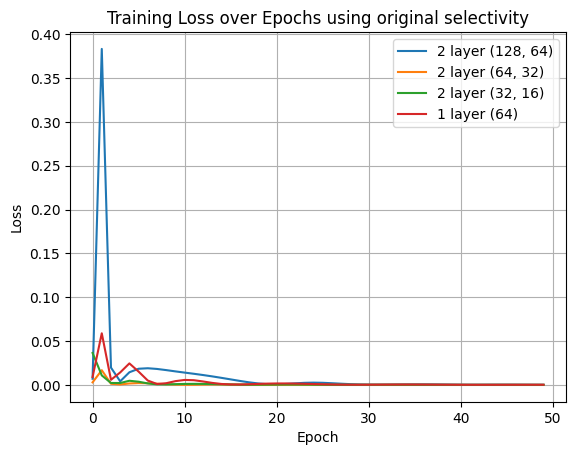

In [14]:
plt.plot(range(epochs), losses_128_64, label='2 layer (128, 64)')
plt.plot(range(epochs), losses_64_32, label='2 layer (64, 32)')
plt.plot(range(epochs), losses_32_16, label='2 layer (32, 16)')
plt.plot(range(epochs), losses_64, label='1 layer (64)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs using original selectivity')
plt.legend()
plt.grid(True)
plt.show()

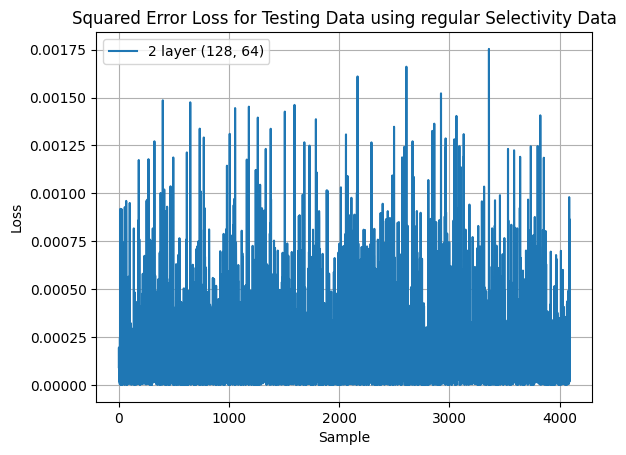

In [15]:
# Compute the loss for the testing data
mse = nn.MSELoss()
test_loss_128_64 = mse(y_pred_test_128_64, y_test)
test_loss_64_32 = mse(y_pred_test_64_32, y_test)
test_loss_32_16 = mse(y_pred_test_32_16, y_test)
test_loss_64 = mse(y_pred_test_64, y_test)


# Now, let's plot the loss
plt.figure()
plt.plot(range(len(y_test)), (y_pred_test_128_64 - y_test)**2, label='2 layer (128, 64)')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.title('Squared Error Loss for Testing Data using regular Selectivity Data')
plt.legend()
plt.grid(True)
plt.show()

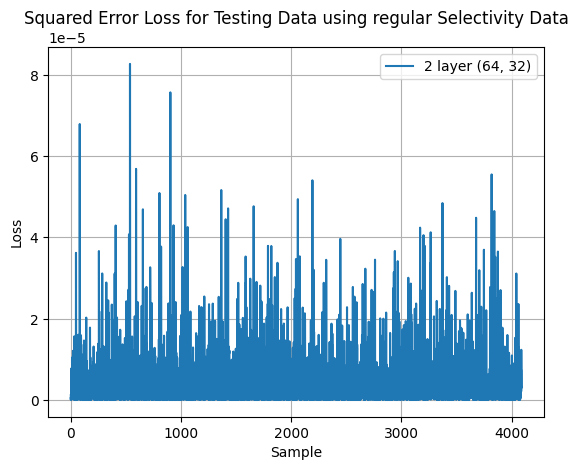

In [16]:
plt.plot(range(len(y_test)), (y_pred_test_64_32 - y_test)**2, label='2 layer (64, 32)')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.title('Squared Error Loss for Testing Data using regular Selectivity Data')
plt.legend()
plt.grid(True)
plt.show()

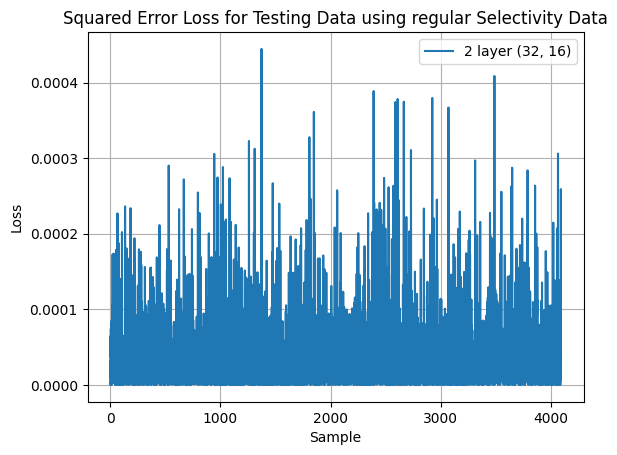

In [17]:
plt.plot(range(len(y_test)), (y_pred_test_32_16 - y_test)**2, label='2 layer (32, 16)')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.title('Squared Error Loss for Testing Data using regular Selectivity Data')
plt.legend()
plt.grid(True)
plt.show()

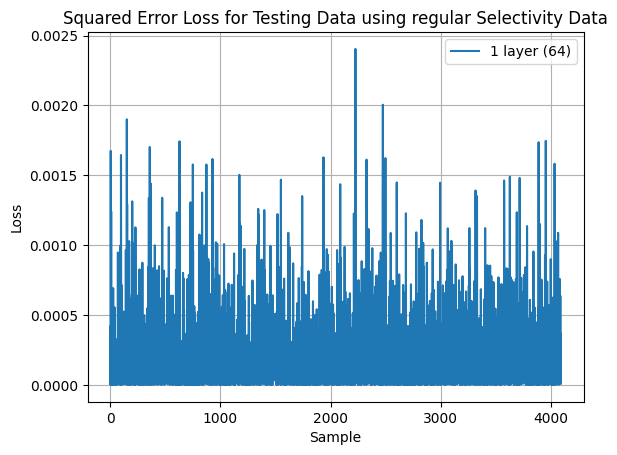

In [18]:
plt.plot(range(len(y_test)), (y_pred_test_64 - y_test)**2, label='1 layer (64)')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.title('Squared Error Loss for Testing Data using regular Selectivity Data')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-19-6dc627baa750>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=average_test_loss, palette="tab10")


<Axes: >

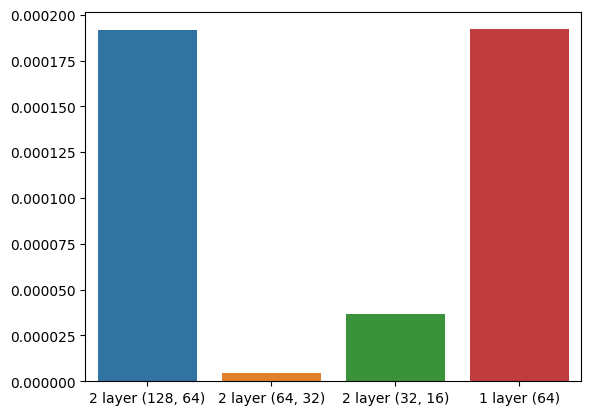

In [19]:
average_test_loss = [test_loss_128_64.item(), test_loss_64_32.item(), test_loss_32_16.item(), test_loss_64.item()]
labels = ['2 layer (128, 64)', '2 layer (64, 32)', '2 layer (32, 16)', '1 layer (64)']

sns.barplot(x=labels, y=average_test_loss, palette="tab10")